In [10]:
import math

def f(x):
    return x**3 + 3 * x**2 - 3*x - 9

def xk(raz, dwa):
    r = raz - (f(raz)*(raz - dwa)) / (f(raz) - f(dwa))
    return r


    
f(-3)

0

In [3]:
z = 10
i = 0
while z > 0.00000001:
    z = z/2
    i = i+1
print(i)

30


In [1]:
import math

class Wynik:
    def __init__(self, typ, x=None, y=None, fx=None, fy=None, ttk=None, start_y=None, start_x=None):
        self.typ = typ
        self.x = x
        self.y = y
        self.fx = fx
        self.fy = fy
        self.ttk = ttk
        self.start_x = start_x
        self.start_y = start_y
        
#     def __init__(self, typ):
#         self.typ = typ

def sieczne_krok(f, x, y):
    return x - (f(x) * (x - y)) / (f(x) - f(y))


def funkcja(x):
    return math.log(x**2) - math.sin(x) - 2

def sieczne(f, x, y, eps):
    ttk = 64
    start_x=x; start_y=y
    while ttk > 0 and abs(x-y) > eps:
        temp = sieczne_krok(f, x, y)
        x = y
        y = temp
        ttk = ttk - 1
#     print("Sieczne:")
#     print( "x: {}   y: {}   f(x): {}   f(y): {}    ttk: {}".format(x, y, f(x), f(y), ttk) )
    return Wynik("sieczne", x, y, f(x), f(y), ttk, start_x, start_y)
    
def który_mniejszy(x, y):
    if x < y:
        return x, y
    else:
        return y, x
    
def różne_znaki(x, y):
    if x * y < 0:
        return True
    else:
        return False
    
def bisekcja(f, x, y, eps):
    if not różne_znaki(f(x), f(y)):
#         print("f(x) i f(y) mają ten sam znak - a to niedobrze")
        return Wynik("bisekcja - znak")
    x, y = który_mniejszy(x, y)
    ttk = 64
    while ttk > 0 and abs(x - y) > eps:
        środek = (x + y) / 2
        if f(środek) < 0:
            x = środek
        else:
            y = środek
        ttk = ttk - 1
#     print("Bisekcja:")
#     print( "x: {}   y: {}   f(x): {}   f(y): {}    ttk: {}".format(x, y, f(x), f(y), ttk) )
    return Wynik("bisekcja", x, y, f(x), f(y), ttk)
    
def sieczne_plus(f, x, y, eps):
    if not różne_znaki(f(x), f(y)):
#         print("f(x) i f(y) mają ten sam znak - a to niedobrze")
        return Wynik("sieczne+ - znak")
    x, y = który_mniejszy(x, y)
    ttk = 64
    while ttk > 0 and abs(x - y) > eps:
        kolejny = sieczne_krok(f, x, y) 
        if f(kolejny) < 0:
            x = kolejny
        else:
            y = kolejny
        ttk = ttk - 1
#     print("Sieczne z plusem:")
#     print( "x: {}   y: {}   f(x): {}   f(y): {}    ttk: {}".format(x, y, f(x), f(y), ttk) )
    return Wynik("sieczne+", x, y, f(x), f(y), ttk)
    

e=0.00000001
wyniki = []
r = [x * 0.1 for x in range (-100,100)]
for i in r:
    for j in r:
        # i nie może być równe j, co więcej przedział nie może zawierać 0 (funkcja nie jest ciągła w 0)
        if i < j and i*j > 0:              
            wyniki.append(sieczne(funkcja,i,j,e))
            wyniki.append(bisekcja(funkcja,i,j,e))
            wyniki.append(sieczne_plus(funkcja,i,j,e))
            
sieczne_zbieżne = 0
sieczne_rozbieżne = 0
bisekcja_zbieżne = 0
bisekcja_znak = 0
sieczne_plus_zbieżne = 0
sieczne_plus_znak = 0

s_suma_ttk = 0
b_suma_ttk = 0
sp_suma_ttk = 0

punkty_złe_dla_siecznych = []
            
for j in wyniki:
    i = j.typ
    if i == "sieczne":
        if j.ttk > 0:
            sieczne_zbieżne += 1
            s_suma_ttk += j.ttk
        else:
            sieczne_rozbieżne += 1
            punkty_złe_dla_siecznych.append( (j.start_x, j.start_y) )
    if i == "bisekcja":
        bisekcja_zbieżne += 1
        b_suma_ttk += j.ttk
    if i == "bisekcja - znak":
        bisekcja_znak += 1
    if i == "sieczne+":
        sieczne_plus_zbieżne += 1
        sp_suma_ttk += j.ttk
    if i == "sieczne+ - znak":
        sieczne_plus_znak += 1
        
print( "S: {}  SR: {}  B: {}  BZ: {}  SP: {}  SPZ: {}".format(sieczne_zbieżne, sieczne_rozbieżne, bisekcja_zbieżne, bisekcja_znak, sieczne_plus_zbieżne, sieczne_plus_znak) )
s_średnia_ttk = s_suma_ttk / sieczne_zbieżne
sss = s_suma_ttk / (sieczne_zbieżne + sieczne_rozbieżne)
b_średnia_ttk = b_suma_ttk / bisekcja_zbieżne
sp_średnia_ttk = sp_suma_ttk / sieczne_plus_zbieżne
print( "s_średnia: {:=4.2f} ({:=4.2f})  b_średnia: {:=4.2f}  sp_średnia: {:=4.2f}".format(s_średnia_ttk, sss, b_średnia_ttk, sp_średnia_ttk) )

for i in punkty_złe_dla_siecznych:
    print(i)

7.7, 2.8000000000000003)
(7.800000000000001, 2.8000000000000003)
(7.9, 2.8000000000000003)
(8.0, 2.8000000000000003)
(8.1, 2.8000000000000003)
(8.200000000000001, 2.8000000000000003)
(8.3, 2.8000000000000003)
(8.4, 2.8000000000000003)
(8.5, 2.8000000000000003)
(8.6, 2.8000000000000003)
(7.4, 2.9000000000000004)
(7.800000000000001, 3.2)
(7.9, 3.2)
(8.0, 3.2)
(8.1, 3.2)
(7.1000000000000005, 3.3000000000000003)
(7.2, 3.3000000000000003)
(8.3, 3.3000000000000003)
(8.5, 3.3000000000000003)
(8.6, 3.3000000000000003)
(8.700000000000001, 3.3000000000000003)
(8.8, 3.3000000000000003)
(6.7, 3.4000000000000004)
(8.0, 3.4000000000000004)
(8.8, 3.4000000000000004)
(8.9, 3.4000000000000004)
(9.1, 3.4000000000000004)
(7.2, 3.5)
(7.300000000000001, 3.5)
(7.4, 3.5)
(7.5, 3.5)
(7.6000000000000005, 3.5)
(7.7, 3.5)
(7.800000000000001, 3.5)
(7.9, 3.5)
(8.0, 3.5)
(8.1, 3.5)
(8.200000000000001, 3.5)
(8.9, 3.5)
(9.200000000000001, 3.5)
(9.3, 3.5)
(9.4, 3.5)
(6.800000000000001, 3.6)
(6.9, 3.6)
(7.0, 3.6)
(7.10

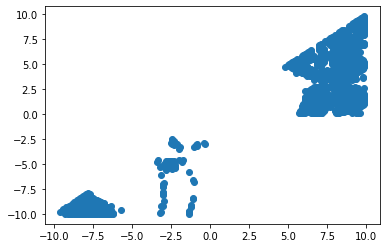

In [3]:
import matplotlib.pyplot as plt 

x=[]
y=[]
for i in range(len(punkty_złe_dla_siecznych)):
    x.append(punkty_złe_dla_siecznych[i][0])
    y.append(punkty_złe_dla_siecznych[i][1])

plt.scatter(x,y)